In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Iris dataset.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.size

750

In [8]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.duplicated().sum()


3

In [10]:
df1=df. drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


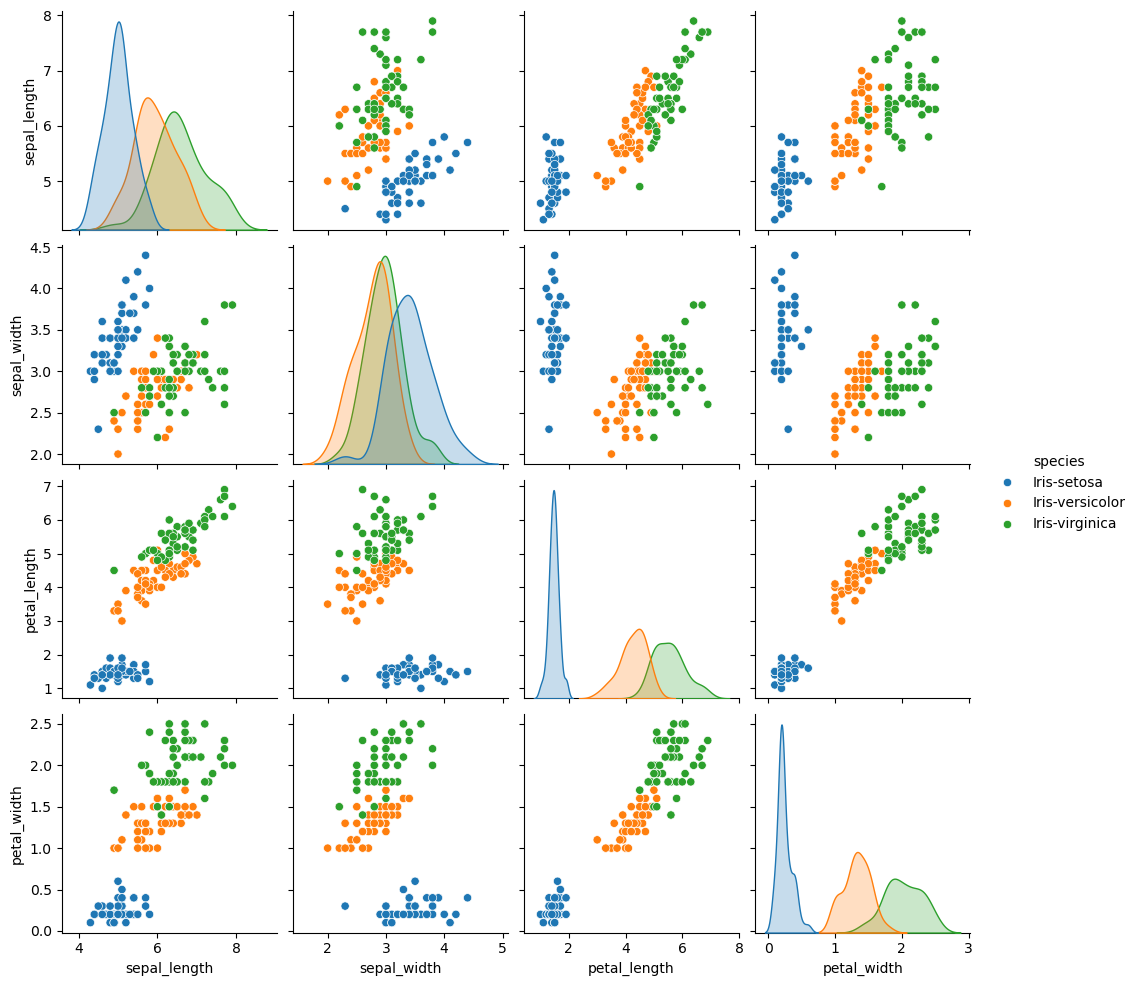

In [13]:
sns.pairplot(df, hue="species")
plt.show()


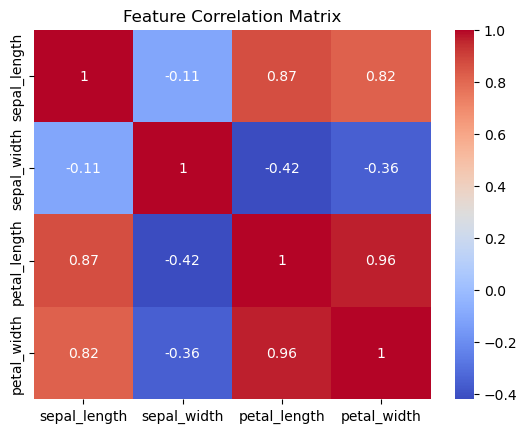

In [14]:
corr_matrix = df.drop("species", axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [16]:
x = df.drop('species', axis=1)
y = df['species']


In [17]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(x)

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(xscaled, y, test_size=0.3, random_state=42)

In [19]:
k_values = [1, 3, 5, 7, 9]
accuracy_results = {}

In [20]:
y.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [21]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    acc = accuracy_score(ytest, ypred)
    accuracy_results[k] = acc

accuracy_results

{1: 0.9777777777777777, 3: 1.0, 5: 1.0, 7: 1.0, 9: 1.0}

In [22]:
knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(xtrain, ytrain)
ypred = knn_best.predict(xtest)



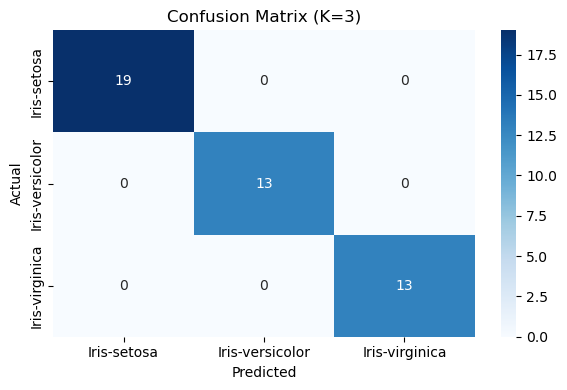

In [23]:
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_best.classes_, yticklabels=knn_best.classes_)
plt.title("Confusion Matrix (K=3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [27]:
x = df[['petal_length', 'petal_width']]
y = df['species']

In [28]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(x)

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(xscaled, y, test_size=0.3, random_state=42)

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [31]:
h = 0.02
x_min, x_max = xscaled[:, 0].min() - 1, xscaled[:, 0].max() + 1
y_min, y_max = xscaled[:, 1].min() - 1, xscaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [32]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [37]:
from sklearn.preprocessing import LabelEncoder
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

In [35]:
le = LabelEncoder()
Z_num = le.fit_transform(Z)  
Z_num = Z_num.reshape(xx.shape)

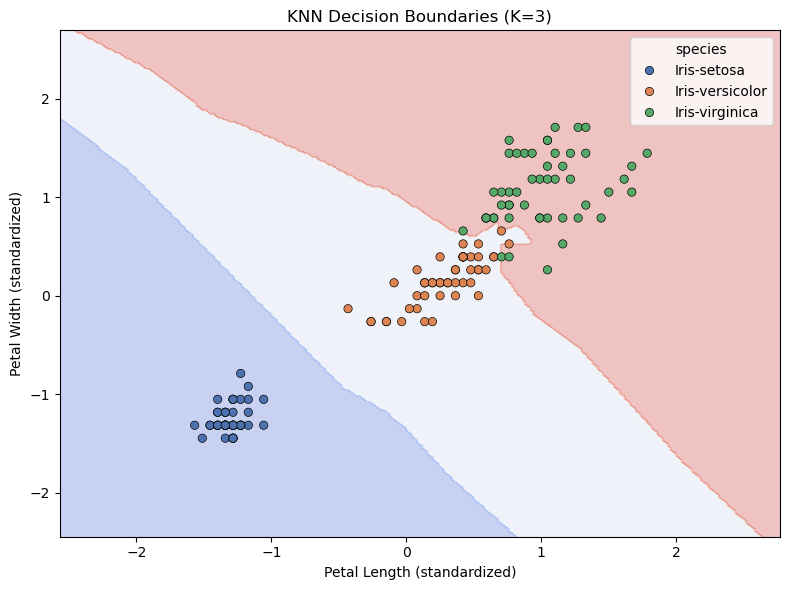

In [36]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_num, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=xscaled[:, 0], y=xscaled[:, 1], hue=y, palette='deep', edgecolor='k')
plt.xlabel("Petal Length (standardized)")
plt.ylabel("Petal Width (standardized)")
plt.title("KNN Decision Boundaries (K=3)")
plt.tight_layout()
plt.show()

